**Importing the Dependencies**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Loading the MNIST dataset from keras**

In [60]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [61]:
X_train.shape

(60000, 28, 28)

In [62]:
print(X_train[0]) # a 28*28 dimension array

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [63]:
# Normalizing the X_train values from 0-255 to 0-1

X_train_nrm = X_train/255
X_test_nrm = X_test/255

In [64]:
cv2_imshow(X_train[5])
print(y_train[5])


2


In [65]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
model  = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),strides=2,padding="same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="same"))

model.add(Conv2D(64,kernel_size=(3,3),strides=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="same"))

model.add(Conv2D(128,kernel_size=(3,3),strides=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="same"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(32,activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(10,activation="softmax"))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [68]:
callback = EarlyStopping(
                          monitor = "val_loss",
                          min_delta = 0.0001,
                          patience=20,
                          verbose=1,
                          mode="auto",
                          baseline=None,
                          restore_best_weights=False
)

In [69]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [70]:
record = model.fit(X_train_nrm,y_train,epochs=20,validation_data=(X_test_nrm,y_test),callbacks=callback)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3489 - accuracy: 0.8905 - val_loss: 0.1047 - val_accuracy: 0.9672
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1069 - accuracy: 0.9712 - val_loss: 0.0719 - val_accuracy: 0.9795
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0757 - accuracy: 0.9790 - val_loss: 0.0741 - val_accuracy: 0.9784
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0621 - accuracy: 0.9840 - val_loss: 0.0552 - val_accuracy: 0.9835
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0506 - accuracy: 0.9864 - val_loss: 0.0587 - val_accuracy: 0.9829
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0437 - accuracy: 0.9880 - val_loss: 0.0482 - val_accuracy: 0.9857
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0380 - accuracy: 0.9891 - val_loss: 0.0458 - val_accuracy

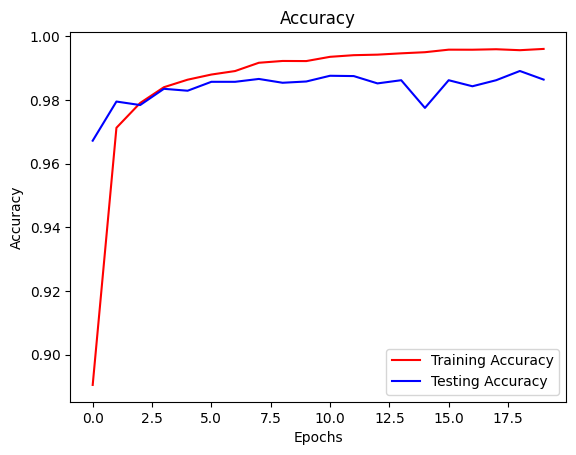

In [71]:
plt.plot(record.history["accuracy"],color="red")
plt.plot(record.history["val_accuracy"],color="blue")

plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Testing Accuracy"])
plt.show()

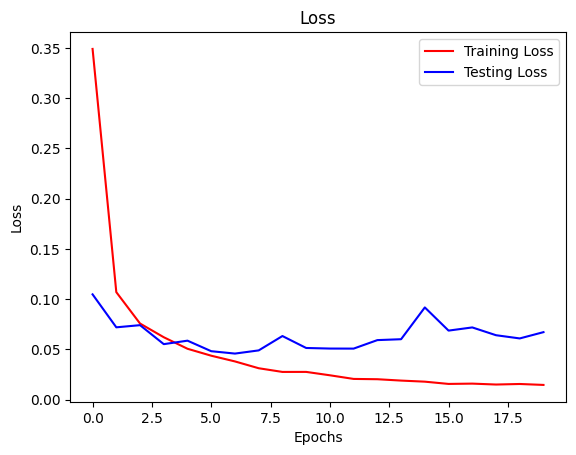

In [72]:
plt.plot(record.history["loss"],color="red")
plt.plot(record.history["val_loss"],color="blue")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss","Testing Loss"])
plt.show()

**Manually Checking Model Accuracy**

In [73]:
loss,accuracy = model.evaluate(X_test_nrm,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9864


In [74]:
Y_pred = model.predict(X_test_nrm)

313/313 [==============================] - 1s 2ms/step


In [75]:
print(Y_pred.shape)
print(Y_pred)

(10000, 10)
[[0.0000000e+00 6.6039295e-30 1.6486102e-20 ... 1.0000000e+00
  1.9361880e-37 6.1578039e-19]
 [1.4244419e-20 5.0590652e-22 1.0000000e+00 ... 1.5233753e-16
  5.1957957e-23 4.9927302e-22]
 [2.9509935e-15 1.0000000e+00 5.2314703e-10 ... 2.9931114e-15
  7.8834904e-13 8.8175242e-14]
 ...
 [1.4134625e-23 5.7601916e-19 1.7182535e-17 ... 1.1254261e-12
  2.4726891e-18 1.1916551e-10]
 [1.6057119e-24 1.6685517e-21 3.5874858e-28 ... 2.3049320e-25
  6.5260526e-09 1.8265500e-14]
 [5.2725304e-14 1.1008091e-17 1.8866858e-17 ... 5.6712843e-24
  2.4861818e-10 4.6773248e-19]]


**Model.predict gives the prediction of probability of each class for the data point**

In [76]:
print(Y_pred[0])

[0.0000000e+00 6.6039295e-30 1.6486102e-20 5.4188283e-24 3.5043237e-23
 1.7831285e-37 0.0000000e+00 1.0000000e+00 1.9361880e-37 6.1578039e-19]


In [77]:
print(np.argmax(Y_pred[0]))

7


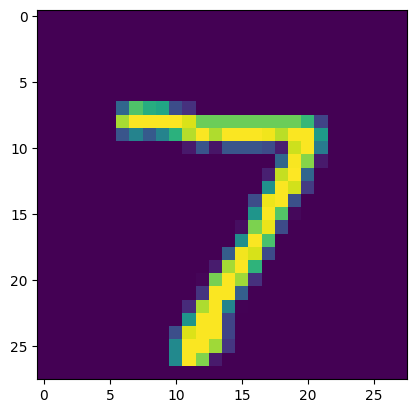

In [78]:
plt.imshow(X_test[0])

In [79]:
#Converting all the prediction probability into labels
y_label = [np.argmax(i) for i in Y_pred]
print(y_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 4, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [80]:
conf_mat = confusion_matrix(y_test,y_label)

In [81]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    1,    0,    0,    0,    0,    0,    0,    1],
       [   0, 1125,    2,    1,    1,    1,    1,    4,    0,    0],
       [   1,    0, 1023,    0,    0,    0,    1,    7,    0,    0],
       [   0,    0,    2,  999,    0,    4,    0,    4,    1,    0],
       [   0,    0,    1,    0,  972,    0,    1,    0,    1,    7],
       [   0,    0,    0,    8,    0,  879,    2,    1,    2,    0],
       [   8,    3,    1,    0,    5,    1,  937,    0,    3,    0],
       [   0,    0,    8,    0,    1,    0,    0, 1016,    0,    3],
       [   8,    0,   11,    1,    1,    0,    0,    2,  946,    5],
       [   0,    0,    0,    3,    5,    4,    0,    8,    0,  989]],
      dtype=int32)>

Text(0.5, 36.72222222222221, 'Predicted Values')

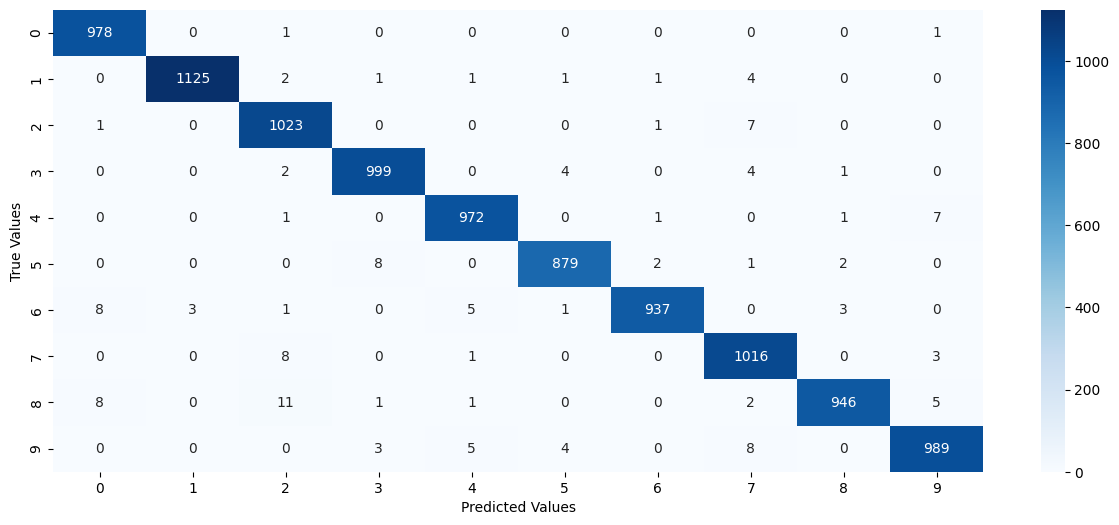

In [82]:
plt.figure(figsize=(15,6))
sns.heatmap(conf_mat,annot=True,fmt="d",cmap="Blues")
plt.ylabel("True Values")
plt.xlabel("Predicted Values")

Building a Predictive system

In [83]:
input_img_path = "/content/test.png"

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
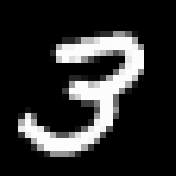

In [84]:
input_img = cv2.imread(input_img_path)
input_img

In [85]:
type(input_img)

numpy.ndarray

In [86]:
gray_scaled = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

In [87]:
print(gray_scaled.shape)

(176, 176)


In [88]:
input_image_resized = cv2.resize(gray_scaled,(28,28))

In [89]:
print(input_image_resized.shape)

(28, 28)


In [90]:
input_image_resized = input_image_resized/255

In [91]:
input_image_reshape = np.reshape(input_image_resized,[1,28,28])

In [92]:
input_prediction = model.predict(input_image_reshape)

1/1 [==============================] - 0s 17ms/step


In [93]:
np.argmax(input_prediction)

3

**Predictive System**

Path of the image:/content/test.png


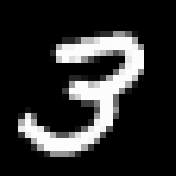

1/1 [==============================] - 0s 16ms/step
The predicted handwritten number is :3


In [94]:
input_img_path = input("Path of the image:")

input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)

gray_scaled = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

input_image_resized = cv2.resize(gray_scaled,(28,28))

input_image_resized = input_image_resized/255

input_image_reshape = np.reshape(input_image_resized,[1,28,28])

input_prediction = model.predict(input_image_reshape)

print(f"The predicted handwritten number is :{np.argmax(input_prediction)}")